In [300]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

In [301]:
df = pd.read_csv('new_train_distance_final4.csv')
# df = df[:2000]
df

,Unnamed: 0,multiple_deliveries,e_Time_Orderd,e_Time_Order_picked,weekday,weekend,holiday,Time_taken (min),distance,Weather conditions_Cloudy,...,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Festival,City_Metropolitian,City_Semi-Urban,City_Urban,hour,time_hour,식사
0,0,1.0,1900-01-01 20:10:00,1900-01-01 20:25:00,2,0,0,19,20.7,0,...,1,0,0,0,1,0,0,20,식사,1
1,1,1.0,1900-01-01 19:25:00,1900-01-01 19:35:00,4,0,1,31,25.4,0,...,0,0,1,0,1,0,0,19,식사,1
2,2,1.0,1900-01-01 12:10:00,1900-01-01 12:20:00,5,1,0,15,11.1,0,...,0,0,1,0,1,0,0,12,식사,1
3,3,1.0,1900-01-01 09:40:00,1900-01-01 09:55:00,6,1,0,15,4.8,0,...,0,1,0,0,0,0,1,9,no식사,0
4,4,1.0,1900-01-01 17:45:00,1900-01-01 18:00:00,3,0,0,26,11.2,0,...,0,1,0,0,1,0,0,17,식사,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14733,15030,1.0,1900-01-01 13:40:00,1900-01-01 13:50:00,2,0,0,19,10.6,0,...,0,1,0,0,1,0,0,13,식사,1
14734,15031,1.0,1900-01-01 22:15:00,1900-01-01 22:30:00,5,1,0,18,15.0,0,...,0,1,0,0,0,0,1,22,no식사,0
14735,15032,1.0,1900-01-01 20:10:00,1900-01-01 20:25:00,1,0,0,42,8.4,0,...,0,1,0,0,0,0,1,20,식사,1
14736,15033,1.0,1900-01-01 12:55:00,1900-01-01 13:10:00,0,0,0,24,8.5,0,...,0,1,0,0,0,0,1,12,식사,1


In [302]:
class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.input_dim = input_dim
        self.test1 = nn.Linear(input_dim, 128)
        nn.init.normal_(self.test1.weight, 0.0, 0.005)
        nn.init.constant_(self.test1.bias, 0.)
        self.test2 = nn.Linear(128, 256)
        self.test21 = nn.Linear(256, 256)
        self.test3 = nn.Linear(256, 128)
        #self.test4 = nn.Linear(128, 128)
        self.test5 = nn.Linear(128, 1)
    def forward(self, x):
        # x = x.float()
        # h1 = F.relu(self.fc1(x))
        # h11 = F.relu(self.fc11(h1))
        # h12 = F.relu(self.fc12(h11))
        # h2 = F.relu(self.fc2(h12))
        # h3 = F.relu(self.fc3(h2))
        # h4 = F.relu(self.fc4(h3))
        # h5 = F.relu(self.fc5(h4))
        # h6 = F.relu(self.fc6(h5))
        # h8 = self.fc7(h6)
        x = x.float()
        h1 = F.relu(self.test1(x))
        h2 = F.relu(self.test2(h1))
        h21 = F.relu(self.test21(h2))
        #h22 = F.relu(self.test22(h2))
        h3 = F.relu(self.test3(h21))
        #h4 = F.relu(self.test4(h3))
        h5 = self.test5(h3)

        return h5

In [303]:
split = int(len(df)*0.8)

print('total : ', len(df))
print('split : ', split)

scaler = MinMaxScaler()
scaler2 = MinMaxScaler()
# scaler = StandardScaler()
x = df[['distance', 'multiple_deliveries', 'Festival','Road_traffic_density_Jam','Road_traffic_density_Low']] = scaler.fit_transform(df[['distance', 'multiple_deliveries', 'Festival','Road_traffic_density_Jam','Road_traffic_density_Low']])
y = np.array(df['Time_taken (min)']).astype(float).reshape(-1,1)
y = scaler2.fit_transform(y)
x_train = torch.FloatTensor(x[:split])
y_train = torch.FloatTensor(y[:split])
x_test = torch.FloatTensor(x[split:])
y_test = torch.FloatTensor(y[split:])

print(x_train.size(), y_train.size())
print(x_test.size(), y_test.size())


total :  14738
split :  11790
torch.Size([11790, 5]) torch.Size([11790, 1])
torch.Size([2948, 5]) torch.Size([2948, 1])


In [304]:
batch_size = 32
test_batch_size = 1000
epochs = 10000
lr = 1e-3
#momentum = 0.5
#no_cuda = True
#seed = 1

input_dim = x.shape[1]
#use_cuda = not no_cuda and torch.cuda.is_available()
#torch.manual_seed(seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
kwargs = {'num_workers': 1, 'pin_memory': True} if torch.cuda.is_available() else {}
print("set vars and device done")

set vars and device done


In [305]:
train = torch.utils.data.TensorDataset(x_train, y_train)
test = torch.utils.data.TensorDataset(x_test, y_test)

print(f"Training Data Size : {len(train)}")
print(f"Testing Data Size : {len(test)}")

train_dataloader = DataLoader(dataset=train, batch_size=batch_size, shuffle=False)
test_dataloader  = DataLoader(dataset=test, batch_size=batch_size, shuffle=False)


Training Data Size : 11790
Testing Data Size : 2948


In [306]:
model = DNN(input_dim).to(device)
criterion = nn.MSELoss()
num_epochs = 500
optimizer = optim.Adam(model.parameters(), lr=lr)

[epoch: 0] loss: 0.0295
[epoch: 10] loss: 0.0253
[epoch: 20] loss: 0.0251
[epoch: 30] loss: 0.0250
[epoch: 40] loss: 0.0249
[epoch: 50] loss: 0.0249
[epoch: 60] loss: 0.0249
[epoch: 70] loss: 0.0248
[epoch: 80] loss: 0.0248
[epoch: 90] loss: 0.0248
[epoch: 100] loss: 0.0248
[epoch: 110] loss: 0.0248
[epoch: 120] loss: 0.0248
[epoch: 130] loss: 0.0248
[epoch: 140] loss: 0.0248
[epoch: 150] loss: 0.0248
[epoch: 160] loss: 0.0248
[epoch: 170] loss: 0.0248
[epoch: 180] loss: 0.0248
[epoch: 190] loss: 0.0248
[epoch: 200] loss: 0.0248
[epoch: 210] loss: 0.0248
[epoch: 220] loss: 0.0248
[epoch: 230] loss: 0.0247
[epoch: 240] loss: 0.0247
[epoch: 250] loss: 0.0247
[epoch: 260] loss: 0.0247
[epoch: 270] loss: 0.0247
[epoch: 280] loss: 0.0247
[epoch: 290] loss: 0.0247
[epoch: 300] loss: 0.0247
[epoch: 310] loss: 0.0247
[epoch: 320] loss: 0.0247
[epoch: 330] loss: 0.0247
[epoch: 340] loss: 0.0247
[epoch: 350] loss: 0.0247
[epoch: 360] loss: 0.0247
[epoch: 370] loss: 0.0247
[epoch: 380] loss: 0.02

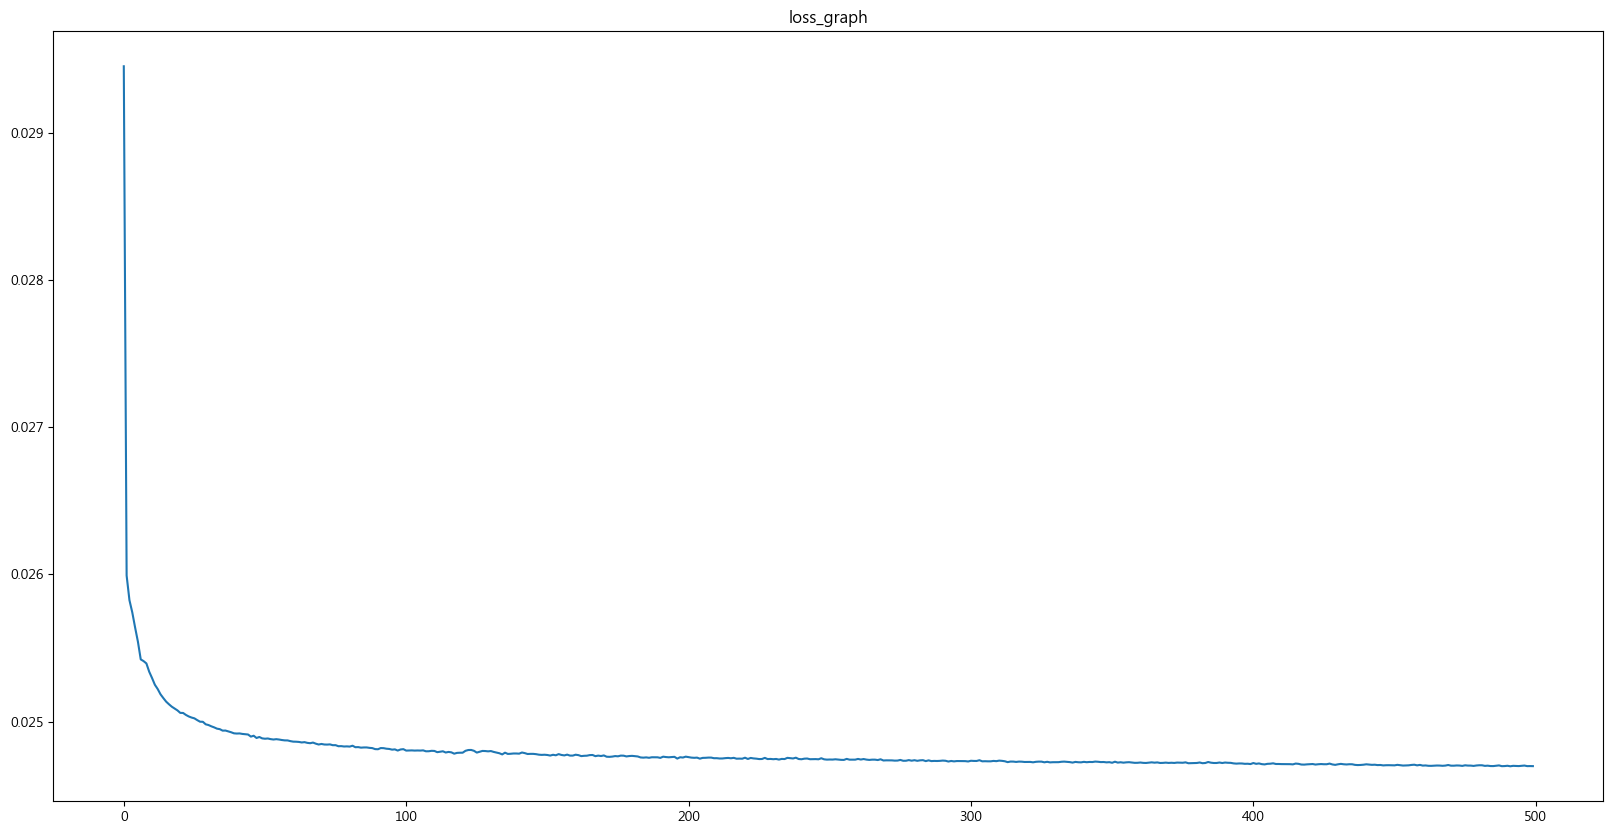

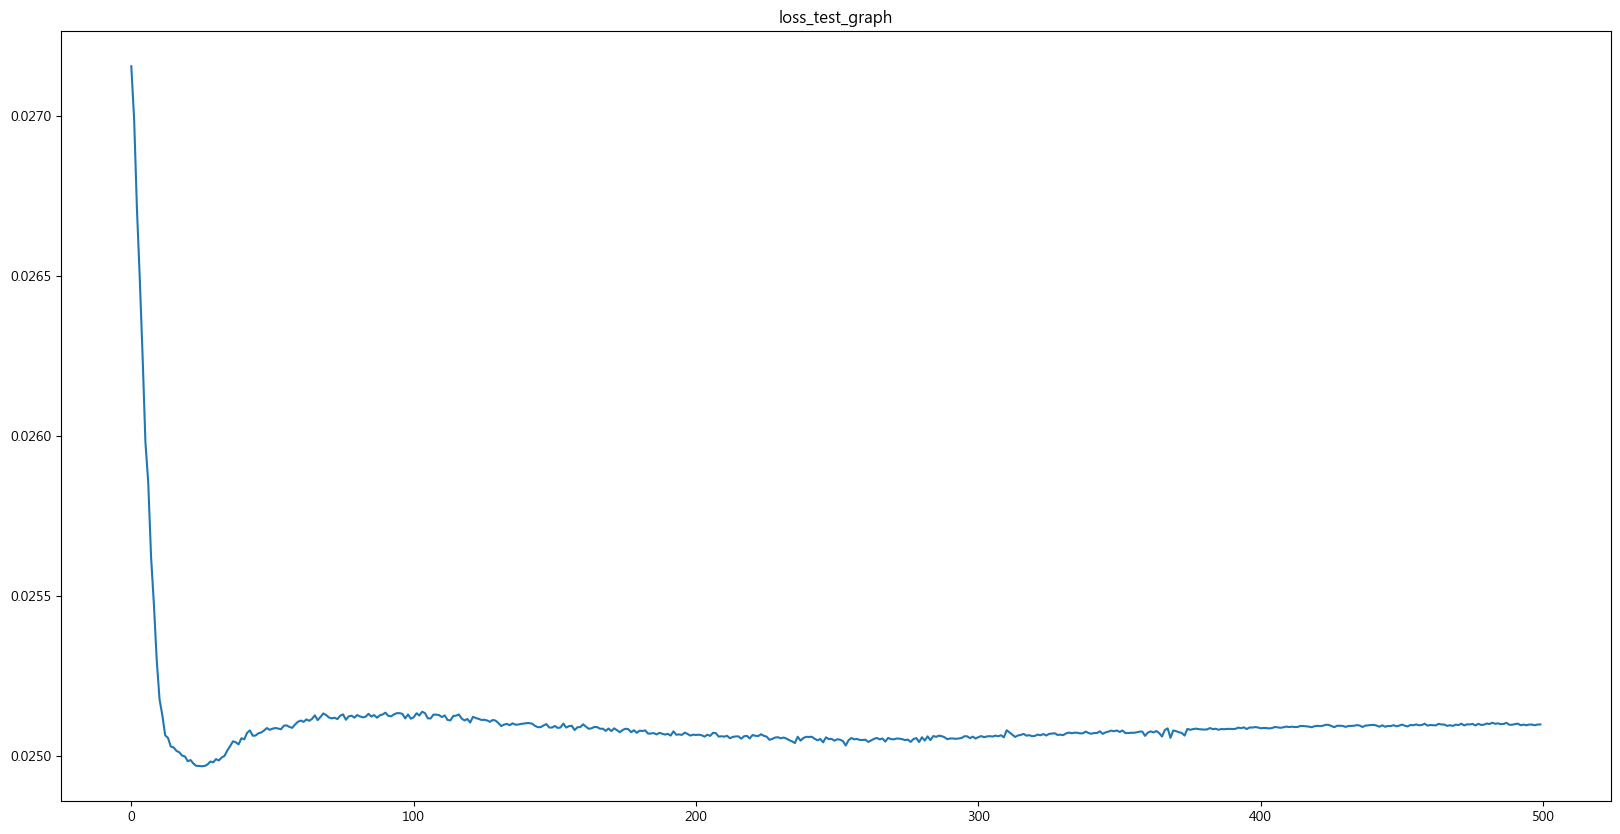

In [307]:
loss_graph = [] # 그래프 그릴 목적인 loss.
loss_test_graph = []
n = len(train_dataloader)
n_test = len(test_dataloader)
for epoch in range(num_epochs):
  running_loss = 0.0
  test_loss = 0.0
  
  for data in train_dataloader:

    seq, target = data # 배치 데이터.
    out = model(seq)   # 모델에 넣고,
    # print(out.size(), target.size())
    loss = criterion(out, target) # output 가지고 loss 구하고,
    optimizer.zero_grad() # 
    loss.backward() # loss가 최소가 되게하는 
    optimizer.step() # 가중치 업데이트 해주고,
    running_loss += loss.item() # 한 배치의 loss 더해주고,

  for data_test in test_dataloader:
    seq_test, target_test = data_test # 배치 데이터.
    out_test = model(seq_test)   # 모델에 넣고,
    loss_test = criterion(out_test, target_test) # output 가지고 loss 구하고,
    test_loss += loss_test.item() # 한 배치의 loss 더해주고,


  loss_test_graph.append(test_loss / n_test)
  loss_graph.append(running_loss / n) # 한 epoch에 모든 배치들에 대한 평균 loss 리스트에 담고,
  if epoch % 10 == 0:
    print('[epoch: %d] loss: %.4f'%(epoch, running_loss/n))

plt.figure(figsize=(20,10))
plt.plot(loss_graph)
plt.title("loss_graph")
plt.show()

plt.figure(figsize=(20,10))
plt.plot(loss_test_graph)
plt.title("loss_test_graph")
plt.show()

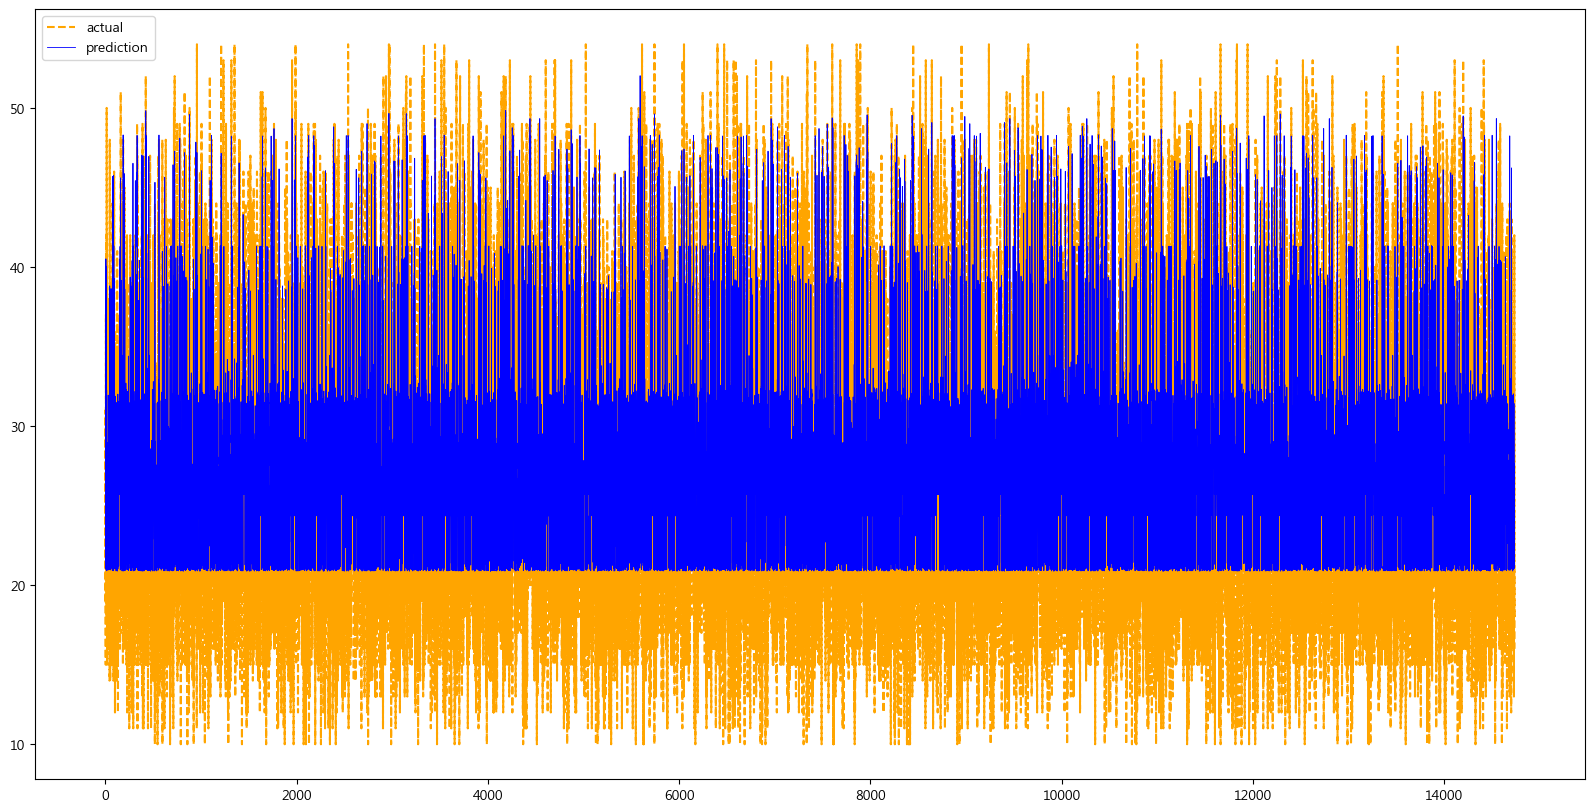

-0.4649686689274435


In [308]:
def plotting(train_loader, test_loader, actual):
    with torch.no_grad():
        train_pred = []
        test_pred = []

    for data in train_loader:
        seq, target = data
        seq, target = seq.to(device), target.to(device)
        out = model(seq)
        out = out.detach().numpy()
        out = scaler2.inverse_transform(out)
        # print(out)
        train_pred += out.tolist()

    for data in test_loader:
        seq, target = data
        out = model(seq)
        out = out.detach().numpy()
        out = scaler2.inverse_transform(out)
        test_pred += out.tolist()
    

    total = train_pred + test_pred
    plt.figure(figsize=(20,10))
    plt.plot(actual, '--', color='orange')
    plt.plot(total, 'b', linewidth=0.6)

    plt.legend(['actual', 'prediction'])
    plt.show()
    total_series = total
    plot_series = pd.Series(total_series)
    data_for_plot = pd.read_csv('./new_train_distance_final4.csv')
    data_for_plot = pd.concat([data_for_plot, plot_series], axis = 1)
    data_for_plot.to_csv("test1.csv")
    r2_s = r2_score(total, df['Time_taken (min)'].values)
    print(r2_s)



plotting(train_dataloader, test_dataloader, df['Time_taken (min)'].values)
